In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
##Loading in the necessary data
time = np.loadtxt('20171003_ch2_interference_w_sas_nodop.isf', delimiter=',')[:,0]
ch2 = np.loadtxt('20171003_ch2_interference_w_sas_nodop.isf', delimiter=',')[:,1]
ch3 = np.loadtxt('20171003_ch3_interference_w_sas_nodop.isf', delimiter=',')[:,1]

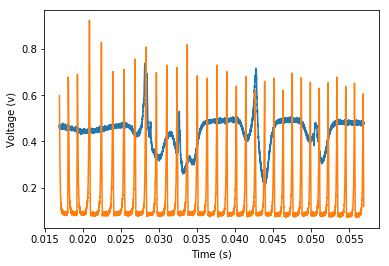

In [3]:
##Initial Plot of data
plt.plot(time, ch2)
plt.plot(time, ch3)
plt.ylabel("Voltage (v)")
plt.xlabel('Time (s)')

In [4]:
##Defining function to pull desired information from the data
def get_peak_data(array, plotrange):
    peak = []
    maximum = 0
    maximum_loc = 0
    max_ind = 0
    inds = []
    for i in range(len(time)):
        if (time[i] >= plotrange[0]) and (time[i] <= plotrange[1]):
            peak.append(array[i])
            inds.append(i)
            if array[i] >= maximum:
                maximum = array[i]
                maximum_loc = time[i]
                max_ind = i
    print("Maximum found at: t = {}".format(maximum_loc))
    print("Maximum value occurs at index: {}".format(max_ind))
    print("Maximum value: {}".format(np.max(peak)))
    plt.plot([time[j] for j in inds], peak)
    plt.plot(maximum_loc, maximum, 'rp')
    return peak

### Isolating the Maximum Values

Maximum found at: t = 0.028124
Maximum value occurs at index: 2803
Maximum value: 0.738


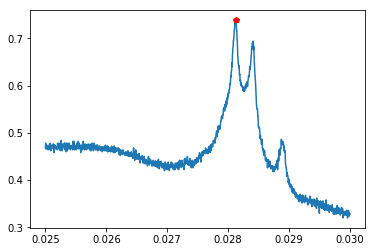

In [5]:
get_peak_data(ch2, [0.025, 0.030]);

Maximum found at: t = 0.03266
Maximum value occurs at index: 3937
Maximum value: 0.53


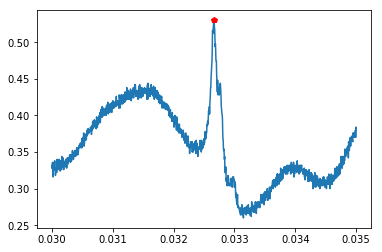

In [6]:
get_peak_data(ch2, [0.030, 0.035]);

Maximum found at: t = 0.042744
Maximum value occurs at index: 6458
Maximum value: 0.716


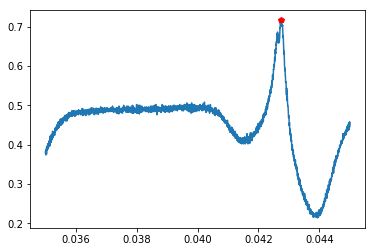

In [7]:
get_peak_data(ch2, [0.0350,0.045]);

Maximum found at: t = 0.05052
Maximum value occurs at index: 8402
Maximum value: 0.48


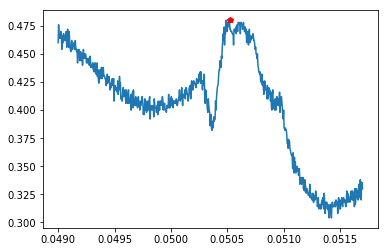

In [8]:
get_peak_data(ch2, [0.049, 0.0517]);

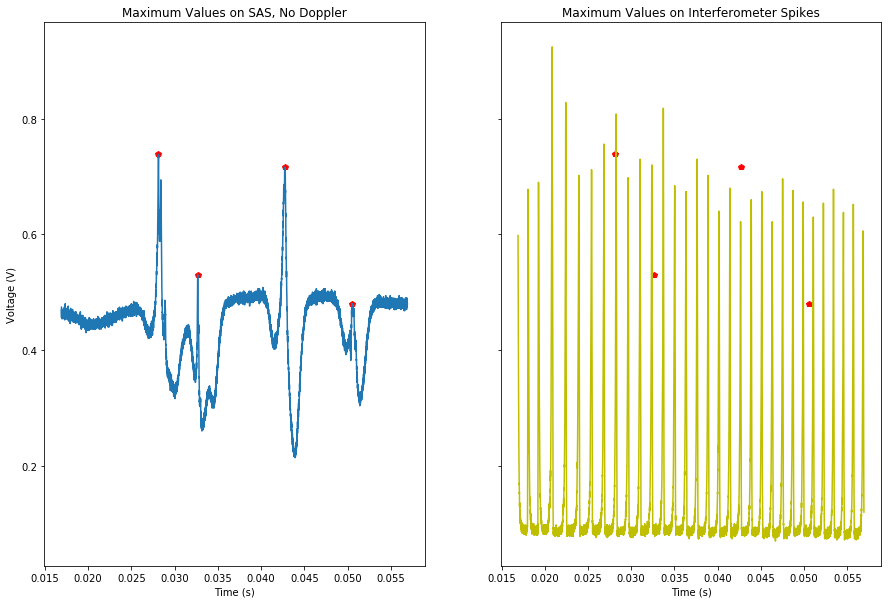

In [22]:
maximum_time_positions = [0.028124, 0.03266, 0.042744, 0.05052]
maximum_voltage_positions = [0.738, 0.53, 0.716, 0.48]

# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
f.set_figheight(10)
f.set_figwidth(15)
ax1.set_title("Maximum Values on SAS, No Doppler")
ax1.set_ylabel("Voltage (V)")
ax1.set_xlabel("Time (s)")
ax1.plot(maximum_time_positions, maximum_voltage_positions, 'rp')
ax1.plot(time, ch2)
ax2.set_title("Maximum Values on Interferometer Spikes")
ax2.set_xlabel("Time (s)")
ax2.plot(maximum_time_positions, maximum_voltage_positions, 'rp')
ax2.plot(time, ch3, 'y-')

The distance between the interferometer peaks should be constant, so finding the time separating two maximum values should tell me how much time elapses between the two peaks, which we can use as a measure of separation of frequencies.

Maximum found at: t = 0.019276
Maximum value occurs at index: 591
Maximum value: 0.6898


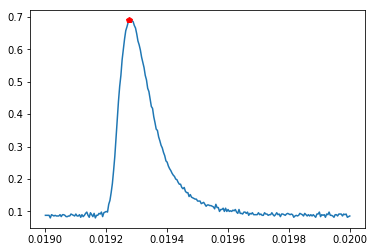

In [10]:
get_peak_data(ch3, [0.019, 0.020]);

Maximum found at: t = 0.020856
Maximum value occurs at index: 986
Maximum value: 0.923784


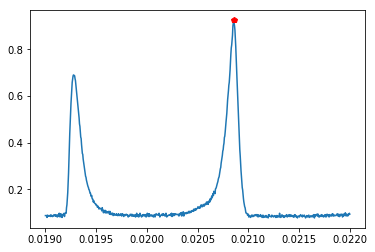

In [11]:
get_peak_data(ch3, [0.019, 0.022]);

In [12]:
0.020856 - 0.019276

0.001579999999999998

The time difference between peaks is 0.00158 seconds.

In [13]:
differences = [0]
for i in range(1,len(maximum_time_positions)):
    differences.append(maximum_time_positions[i]-maximum_time_positions[i-1])
differences

[0, 0.004536000000000002, 0.010083999999999996, 0.007776000000000005]

In [14]:
from prettytable import PrettyTable

In [15]:
x = PrettyTable()

In [17]:
x = PrettyTable()
x.add_column("Time (s)", maximum_time_positions)
x.add_column("Voltage (V)", maximum_voltage_positions)
x.add_column("Difference (s)", [round(i, 5) for i in differences])
x.add_column("Number of Interferometer Distances Apart", [round(i, 5)/0.00158 for i in differences])
x.add_column("Separation of Features (MHz)", [round(i, 5)/0.00158 *379 for i in differences])
print(x)

+----------+-------------+----------------+------------------------------------------+------------------------------+
| Time (s) | Voltage (V) | Difference (s) | Number of Interferometer Distances Apart | Separation of Features (MHz) |
+----------+-------------+----------------+------------------------------------------+------------------------------+
| 0.028124 |    0.738    |       0        |                   0.0                    |             0.0              |
| 0.03266  |     0.53    |    0.00454     |            2.873417721518987             |      1089.0253164556962      |
| 0.042744 |    0.716    |    0.01008     |            6.379746835443038             |      2417.9240506329115      |
| 0.05052  |     0.48    |    0.00778     |            4.924050632911392             |      1866.2151898734176      |
+----------+-------------+----------------+------------------------------------------+------------------------------+


In [19]:
file = open('SummaryTable.txt', 'w')
file.write(str(x))
file.close()